<a href="https://colab.research.google.com/github/ivanjrinacio/Challenger_Alura_Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
## Soma dos valores da coluna preço do df para determinar o faturamento de cada loja
## round para arredondar em 3 casas decimais e dividindo a soma por ser um valor na casa dos
faturamento_loja = round(loja['Preço'].sum()/1000000, 3)
faturamento_loja2 = round(loja2['Preço'].sum()/1000000, 3)
faturamento_loja3 = round(loja3['Preço'].sum()/1000000, 3)
faturamento_loja4 = round(loja4['Preço'].sum()/1000000, 3)


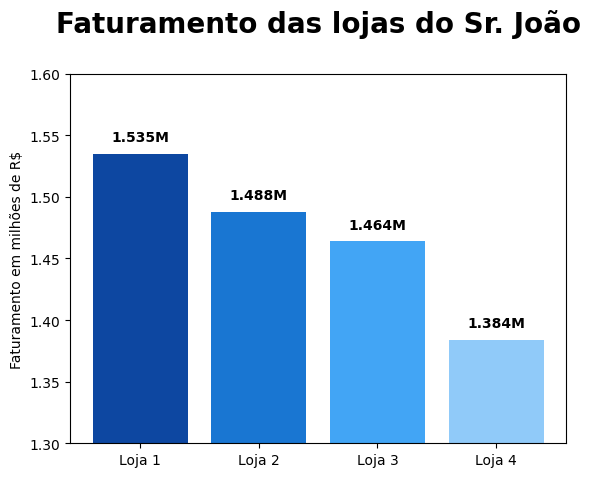

In [4]:
## Criando o gráfico de barras com o matplotlib e rotulando o gráfico
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]
paleta_corporativa = ['#0d47a1', '#1976d2', '#42a5f5', '#90caf9', '#455a64', '#78909c', '#26a69a', '#ffa726']

plt.bar(lojas,
        faturamentos,
        color = paleta_corporativa)
plt.ylabel('Faturamento em milhões de R$')
plt.title('Faturamento das lojas do Sr. João',
          fontsize = 20,
          fontweight = 'bold',
          pad = 30)

# Adiciona o texto com o valor exato no topo de cada barra (espaço entre a barra e o valor é definido pela soma 0.01)
for i in range(len(lojas)):
    plt.text(i, faturamentos[i] + 0.01, f'{faturamentos[i]}M', ha='center', fontweight='bold')
    # O f"{faturamentos[i]}M" formata o número com um "M" de milhões

## Limite do eixo y
plt.ylim(1.3, 1.6)

plt.style.use('seaborn-v0_8-talk')

# 2. Vendas por Categoria


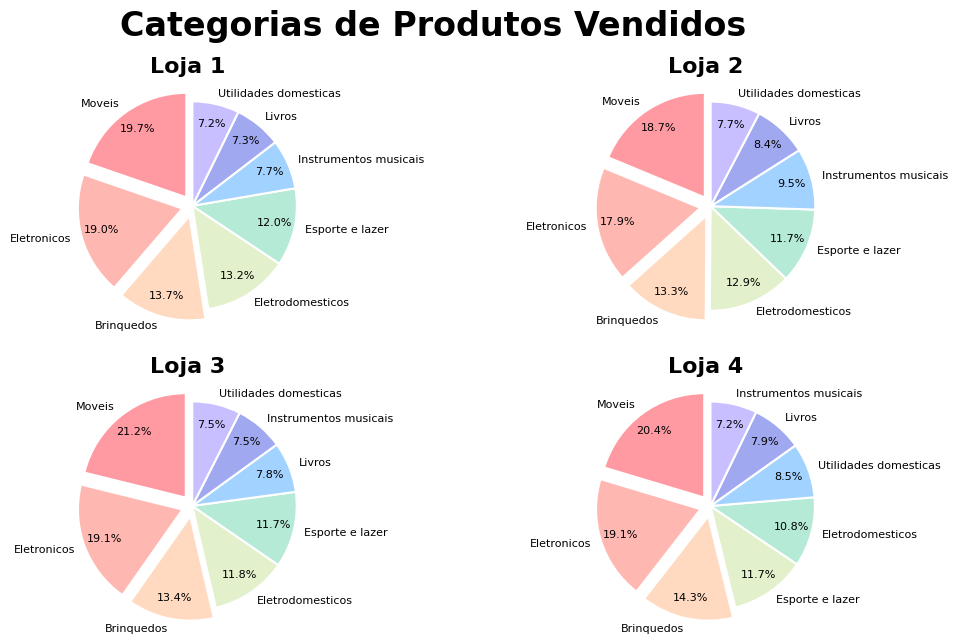

In [44]:
## Usando uma variável para armazenar a contagem de valores da coluna categorias de produtos
vendas_categorias = loja['Categoria do Produto'].value_counts()
vendas_categorias2 = loja2['Categoria do Produto'].value_counts()
vendas_categorias3 = loja3['Categoria do Produto'].value_counts()
vendas_categorias4 = loja4['Categoria do Produto'].value_counts()

# Paleta de cores usada
paleta_pastel = ['#ff9aa2', '#ffb7b2', '#ffdac1', '#e2f0cb', '#b5ead7', '#a2d2ff', '#a0a8f0', '#c7bfff']

# Função para criar a tupla de explode dinamicamente
def criar_valores_explode(dados, num_fatias_explode=3, valor_explode=0.1):
    ## Cria uma tupla para explodir as primeiras 'n' fatias de um gráfico.
    num_categorias = len(dados)
    valores_explode = [0] * num_categorias # Cria uma lista de zeros
    ## Explode as 3 primeiras fatias (ou menos, se houver menos de 3 categorias)
    for i in range(min(num_fatias_explode, num_categorias)):
        valores_explode[i] = valor_explode
    return tuple(valores_explode)

# Definindo o estilo do gráfico
plt.style.use('seaborn-v0_8-talk')

# Criando a figura e os subplots
fig, axs = plt.subplots(2, 2)
fig.suptitle('Categorias de Produtos Vendidos',
             fontsize = 24,
             fontweight = 'bold')

# Gerar os valores de explode para cada gráfico
explode1 = criar_valores_explode(vendas_categorias)
explode2 = criar_valores_explode(vendas_categorias2)
explode3 = criar_valores_explode(vendas_categorias3)
explode4 = criar_valores_explode(vendas_categorias4)

# --- Gráfico [0, 0] ---
axs[0,0].pie(vendas_categorias,
        labels = vendas_categorias.index.str.capitalize(),
        autopct = '%1.1f%%',
        startangle = 90,
        colors = paleta_pastel,
        wedgeprops = {'edgecolor': 'white', 'linewidth': 1.5},
        pctdistance = 0.8,
        labeldistance = 1.1,
        explode=explode1,
        textprops={'fontsize': 8}
            )
axs[0,0].set_title('Loja 1',
          fontsize = 16,
          fontweight = 'bold'
                  )
axs[0,0].axis('equal')

# --- Gráfico [0, 1] ---
axs[0,1].pie(vendas_categorias2,
        labels = vendas_categorias2.index.str.capitalize(),
        autopct = '%1.1f%%',
        startangle = 90,
        colors = paleta_pastel,
        wedgeprops = {'edgecolor': 'white', 'linewidth': 1.5},
        pctdistance = 0.8,
        labeldistance = 1.1,
        explode=explode2,
        textprops={'fontsize': 8}
            )
axs[0,1].set_title('Loja 2',
          fontsize = 16,
          fontweight = 'bold'
                  )
axs[0,1].axis('equal')

# --- Gráfico [1, 0] ---
axs[1,0].pie(vendas_categorias3,
        labels = vendas_categorias3.index.str.capitalize(),
        autopct = '%1.1f%%',
        startangle = 90,
        colors = paleta_pastel,
        wedgeprops = {'edgecolor': 'white', 'linewidth': 1.5},
        pctdistance = 0.8,
        labeldistance = 1.1,
        explode=explode3,
        textprops={'fontsize': 8}
            )
axs[1,0].set_title('Loja 3',
          fontsize = 16,
          fontweight = 'bold'
                  )
axs[1,0].axis('equal')

# --- Gráfico [1, 1] ---
axs[1,1].pie(vendas_categorias4,
        labels = vendas_categorias4.index.str.capitalize(),
        autopct = '%1.1f%%',
        startangle = 90,
        colors = paleta_pastel,
        wedgeprops = {'edgecolor': 'white', 'linewidth': 1.5},
        pctdistance = 0.8,
        labeldistance = 1.1,
        explode=explode4,
        textprops={'fontsize': 8}
            )
axs[1,1].set_title('Loja 4',
          fontsize = 16,
          fontweight = 'bold'
                  )
axs[1,1].axis('equal')

plt.subplots_adjust(
    hspace=0.2,    # Define o espaço vertical entre os gráficos
    wspace=0.8     # Define o espaço horizontal entre os gráficos
)

# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
